In [17]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [18]:
df_public_transport = pd.read_csv('/content/Cleansed_Data_v.3.csv')

In [19]:
df_public_transport.loc[df_public_transport['PublicTransportClosing'] == 0, 'PublicTransportClosing_Definition'] = 'No_Measure'
df_public_transport.loc[df_public_transport['PublicTransportClosing'] == 1, 'PublicTransportClosing_Definition'] = 'Recommend_Closing'
df_public_transport.loc[df_public_transport['PublicTransportClosing'] == 2, 'PublicTransportClosing_Definition'] = 'Require_Closing'

In [20]:
df_public_transport = df_public_transport [['Country',
                                                   'State',
                                                   'Date',
                                                   'PublicTransportClosing_Definition',

                                                   ]]

In [21]:
df_workplace_graph = df_public_transport.groupby(['State','PublicTransportClosing_Definition'])['Date'].count().reset_index(name='Counts')

In [23]:
df_graph_visual = pd.pivot_table(df_workplace_graph, values = 'Counts', index = ['State'],columns = 'PublicTransportClosing_Definition').reset_index()

In [24]:
df_graph_visual


PublicTransportClosing_Definition,State,No_Measure,Recommend_Closing,Require_Closing
0,Alabama,110.0,136.0,NaN
1,Alaska,171.0,16.0,59.0
2,Arizona,133.0,113.0,NaN
3,Arkansas,57.0,189.0,NaN
4,California,246.0,NaN,NaN
5,Colorado,14.0,232.0,NaN
6,Connecticut,12.0,152.0,82.0
7,Delaware,76.0,170.0,NaN
8,Florida,6.0,240.0,NaN
9,Georgia,8.0,238.0,NaN


Text(0, 0.5, 'Number of Days')

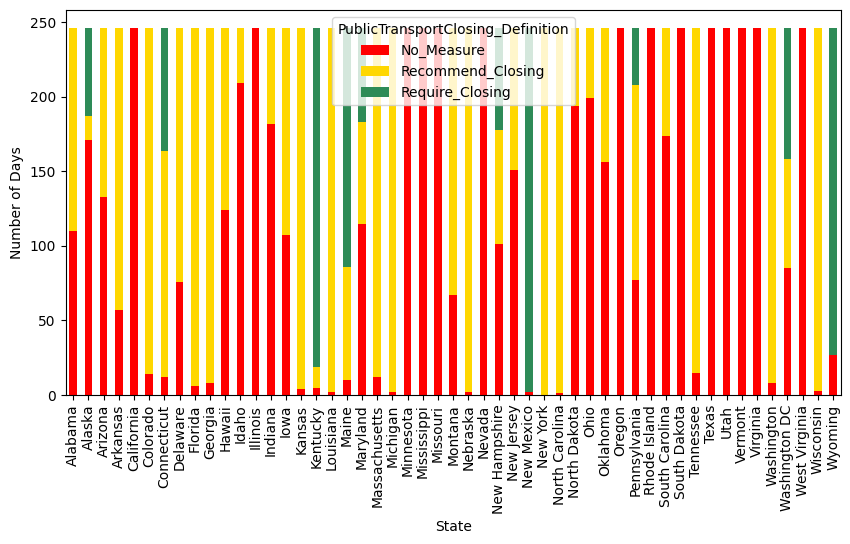

In [30]:
import matplotlib.pyplot as plt
colors = ["red","gold", "seagreen"]
df_graph_visual. plot(x = "State", y = ["No_Measure","Recommend_Closing", "Require_Closing"], kind = "bar", stacked = "true", figsize = (10,5), color = colors)
plt.ylabel("Number of Days")